In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Standard ML models
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [4]:
# SPlitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

In [6]:
# Distrubutions
import scipy

> Loading Data

In [85]:
data = pd.read_csv('student-mat.csv')
data1 =data.copy()
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
print(f'total no. of students : {len(data)}')

total no. of students : 395


In [10]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

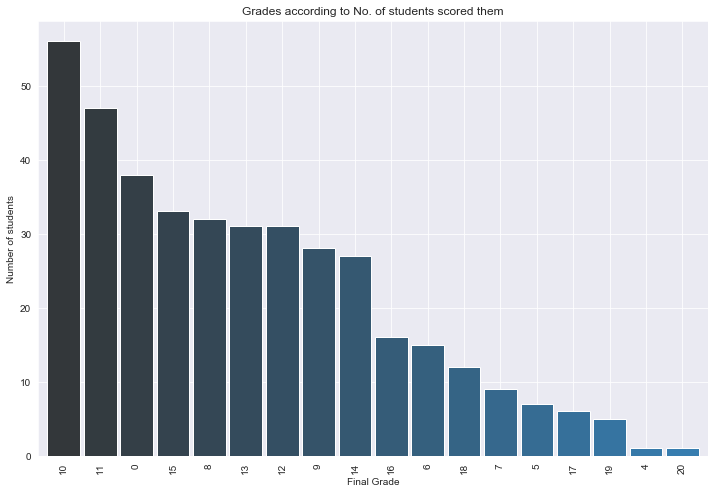

In [33]:
sns.set_style('darkgrid')
plt.subplots(figsize=(12,8))
grade_counts = data['G3'].value_counts().sort_values(ascending =False).plot.bar(
    width=.9,color =sns.color_palette('Blues_d',40))
grade_counts.set_title('Grades according to No. of students scored them')
grade_counts.set_xlabel('Final Grade')
grade_counts.set_ylabel('Number of students')
plt.show()

> Understanding Distrubution of Final Grade

<function matplotlib.pyplot.show(*args, **kw)>

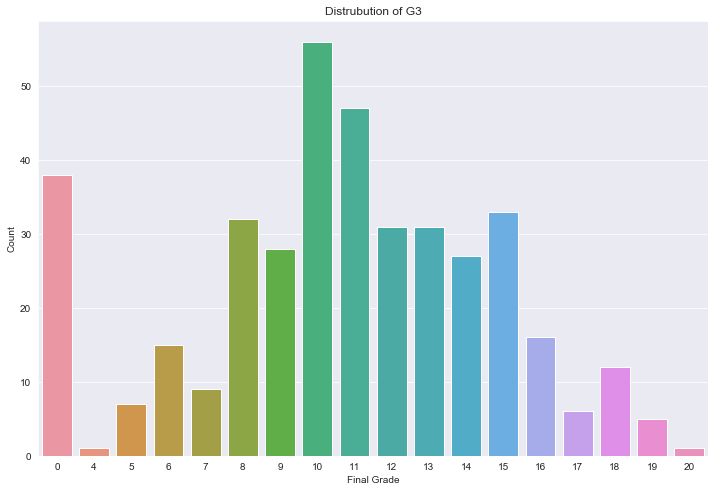

In [43]:
plt.subplots(figsize=(12,8))
g = sns.countplot(data['G3'])
g.set_title('Distrubution of G3')
g.set_xlabel('Final Grade')
g.set_ylabel('Count')
plt.show

* Here apart from Zero ... it looks like Normal Distrubution

In [46]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

#### Let's understand data from Gender Variable

In [50]:
male_students = len(data[data.sex == 'M'])
female_students = len(data[data.sex == 'F'])
print(f'No. of Male Students : {male_students}')
print(f'No. of Female Students : {female_students}')

No. of Male Students : 187
No. of Female Students : 208


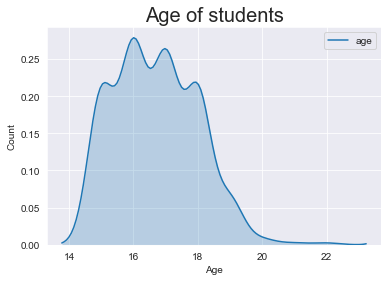

In [55]:
b = sns.kdeplot(data.age,shade =True)
b.axes.set_title('Age of students',fontsize = 20)
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

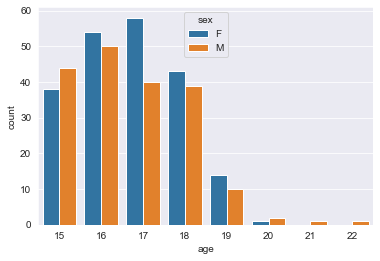

In [61]:
sns.countplot(data.age,hue='sex',data=data)

#### Does age has anything to do with Final Grade

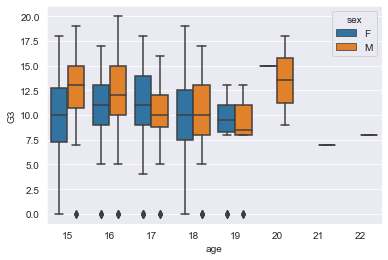

In [65]:
sns.boxplot(x=data.age,y=data.G3,hue=data.sex)

Text(0, 0.5, 'Final Grade')

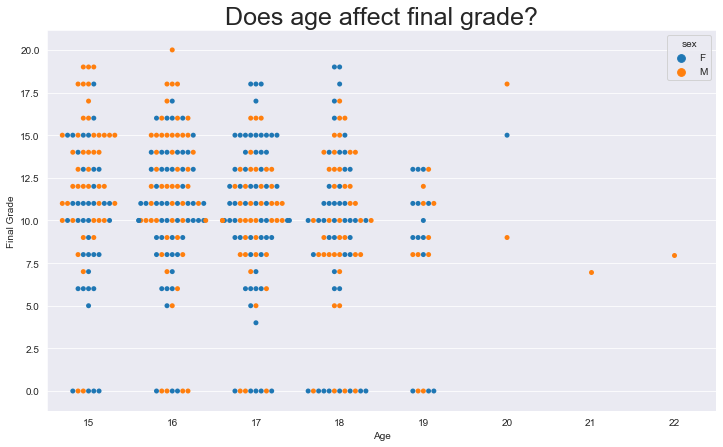

In [68]:
plt.figure(figsize=(12,7)),
b = sns.swarmplot(x = 'age',y='G3',hue  ='sex',data=data)
b.axes.set_title('Does age affect final grade?',fontsize =  25)
b.set_xlabel('Age')
b.set_ylabel('Final Grade')

###### Count of students from Urban or Rural Areas

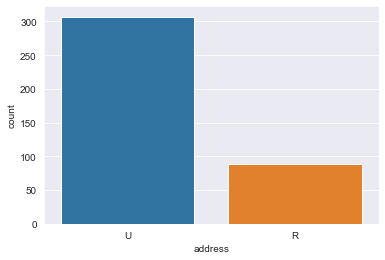

In [70]:
b = sns.countplot(data['address'])

Most of the students are from Urban areas in these Schools...
lets check who did better grades ??

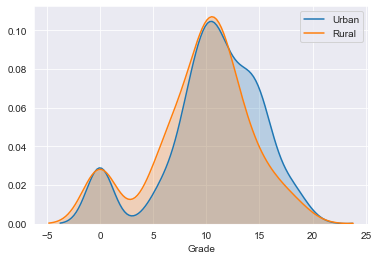

In [77]:
sns.kdeplot(data.loc[data.address=='U','G3'],label = 'Urban',shade = True)
sns.kdeplot(data.loc[data.address=='R','G3'],label = 'Rural',shade = True)
plt.xlabel('Grade')
plt.show()

###### There is no Much difference between Urban and Rural Areas

In [81]:
data.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

The Above correlation is only between Numerical Values
so let's do encoding and understand the data with Grades

In [86]:
labels = data['G3']
data = data.drop(['school','G2','G1'],axis=1)
#  Droping the G2 and G3 because they have good correlation but to understand the data with other features..
# we are dropping them
data = pd.get_dummies(data)

In [87]:
most_correlated = data.corr().abs()['G3'].sort_values(ascending=False)

In [88]:
most_correlated[:9]

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

failures has most correlation with G3 

In [92]:
data = data.loc[:,most_correlated[:9].index]
data.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


#### Now we will analyse these variables and then train a mode

Student with less previous failures usually score higher

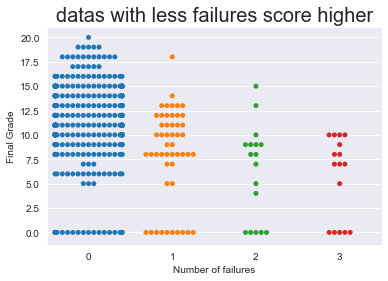

In [96]:
b = sns.swarmplot(x=data['failures'],y=data['G3'])
b.axes.set_title('datas with less failures score higher', fontsize = 20)
b.set_xlabel('Number of failures', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

###### Education of families may have impact on Grades 

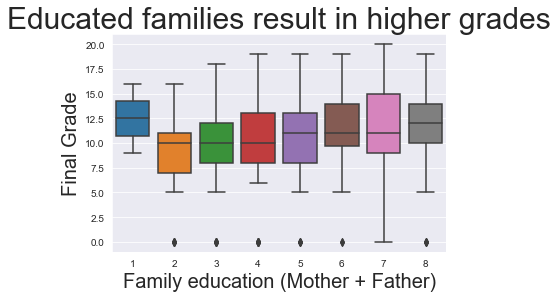

In [98]:
family_ed = data['Fedu'] + data['Medu'] 
b = sns.boxplot(x=family_ed,y=data['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [99]:
data = data.drop('higher_no',axis='columns')
data.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
0,6,0,4,1,18,4,4,1
1,6,0,1,1,17,1,3,1
2,10,3,1,1,15,1,2,1
3,15,0,4,1,15,2,2,0
4,10,0,3,1,16,3,2,1


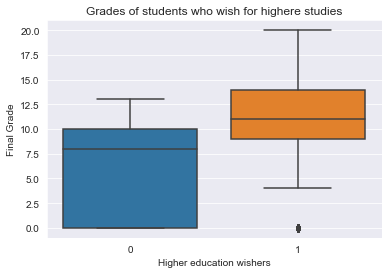

In [100]:
b=sns.boxplot(x=data['higher_yes'],y=data['G3'])
b.axes.set_title('Grades of students who wish for highere studies')
b.set_xlabel('Higher education wishers')
b.set_ylabel('Final Grade')
plt.show()

#### Going Out with Friends

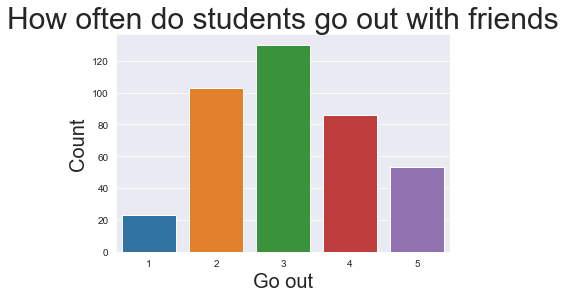

In [104]:
b = sns.countplot(data['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

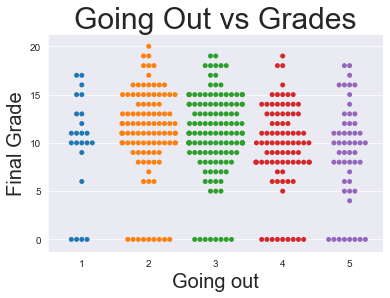

In [106]:
b = sns.swarmplot(x=data['goout'],y=data['G3'])
b.axes.set_title('Going Out vs Grades', fontsize = 30)
b.set_xlabel('Going out', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

* Zero Grades are equally disrubuted to all levels of going out..
* Students who hang out mostly got some less Grades. (comparatively)

#### Does Romantic relationship affect the Grades

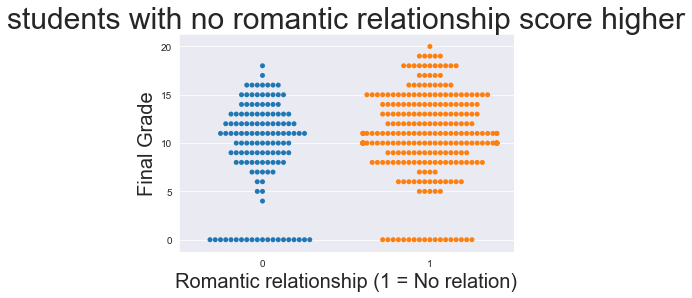

In [108]:
b = sns.swarmplot(x=data['romantic_no'],y=data['G3'])
b.axes.set_title('students with no romantic relationship score higher', fontsize = 30)
b.set_xlabel('Romantic relationship (1 = No relation)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

> Modelling

In [109]:
# splitting the data
xt,XT,yt,YT = train_test_split(data,labels,test_size=0.25)

In [110]:
xt.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
43,11,0,2,1,15,2,1,1
376,15,2,4,1,20,2,3,0
286,19,0,2,1,18,2,3,1
301,10,0,4,1,17,4,1,1
133,11,0,3,1,16,4,1,1


In [111]:
#  Creating a Function to return Mean Absolute Error & RMSE
def ev_pred(p,t):
    mae = np.mean(abs(p-t))
    rmse = np.sqrt(metrics.mean_squared_error(p,t))
    return mae,rmse

> Applying Different Algorithms to data

In [118]:
def evaluate(xt,XT,yt,YT):
    models_names = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    xt = xt.drop('G3',axis=1)
    XT = XT.drop('G3',axis=1)
#     Instantiation of Models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0,l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR()
    model6 = GradientBoostingRegressor(n_estimators=100)
    
#      Data Frame for Results
    results = pd.DataFrame(columns=['MAE','RMSE'],index = models_names)
    
    for i,model in enumerate([model1,model2,model3,model4,model5,model6]):
        model.fit(xt,yt)
        YTP = model.predict(XT)
        
#         Metrics
        from sklearn import metrics
        mae = np.mean(abs(YTP-YT))
        rmse = np.sqrt(metrics.mean_squared_error(YTP,YT))
        
        model_name = models_names[i]
        results.loc[model_name,:] = [mae,rmse]
        
    return results

In [119]:
res = evaluate(xt,XT,yt,YT)

C:\Users\Axsteen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [127]:
res=res.drop('Baseline',axis=0)

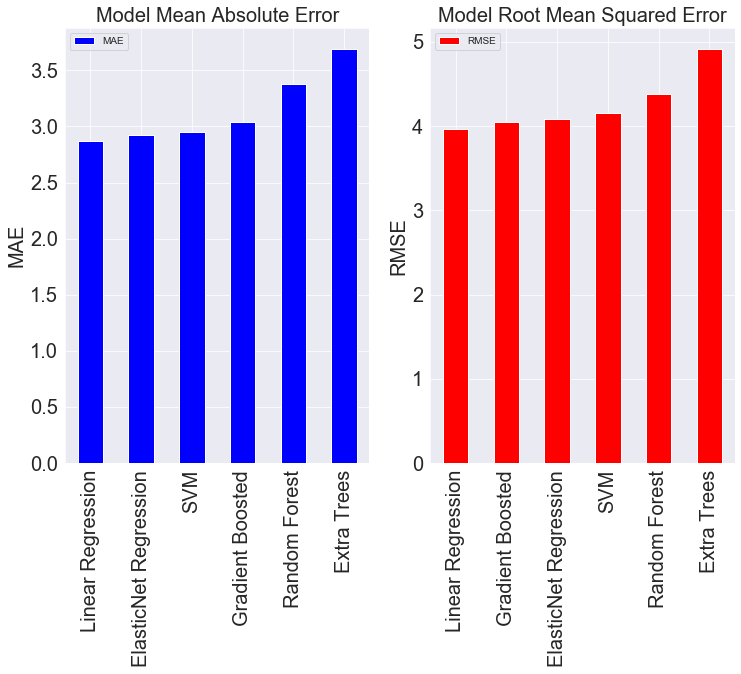

In [128]:
plt.figure(figsize=(12,8))

# Median absolute percentage error
ax =  plt.subplot(1, 2, 1)
res.sort_values('MAE', ascending = True).plot.bar(y = 'MAE', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Root mean squared error
ax = plt.subplot(1, 2, 2)
res.sort_values('RMSE', ascending = True).plot.bar(y = 'RMSE', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()